# Regularization

## The dataset

This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University. This is part of the data that was used in the 1988 ASA Graphics Section Poster Session. The salary data were originally from Sports Illustrated, April 20, 1987. The 1986 and career statistics were obtained from The 1987 Baseball Encyclopedia Update published by Collier Books, Macmillan Publishing Company, New York.

### Format
A data frame with 263 observations of major league players on the following 20 variables:
- AtBat: Number of times at bat in 1986
- Hits: Number of hits in 1986
- HmRun: Number of home runs in 1986
- Runs: Number of runs in 1986
- RBI: Number of runs batted in in 1986
- Walks: Number of walks in 1986
- Years: Number of years in the major leagues
- CAtBat: Number of times at bat during his career
- CHits: Number of hits during his career
- CHmRun: Number of home runs during his career
- CRuns: Number of runs during his career
- CRBI: Number of runs batted in during his career
- CWalks: Number of walks during his career
- League: A factor with levels A and N indicating player’s league at the end of 1986
- Division: A factor with levels E and W indicating player’s division at the end of 1986
- PutOuts: Number of put outs in 1986
- Assists: Number of assists in 1986
- Errors: Number of errors in 1986
- Salary: 1987 annual salary on opening day in thousands of dollars
- NewLeague: A factor with levels A and N indicating player’s league at the beginning of 1987

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("Data/baseball.csv", index_col="Name")
data.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
Name,,,,,,,,,,,,,,,,,,,,
Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, Alan Ashby to Willie Wilson
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
d

<Axes: >

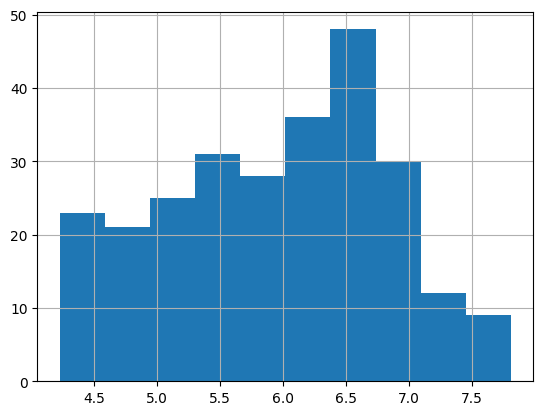

In [3]:
np.log1p(data['Salary']).hist(bins=10)

## Preprocessing Pipeline

In [4]:
# Identify categorical and numeric columns
categorical_columns = [
    'League', 
    'Division'
    ]

numeric_columns = [
    'AtBat',
    'Hits',
    'HmRun',
    'Runs',
    'RBI',
    'Walks',
    'Years',
    'CAtBat',
    'CHits',
    'CHmRun',
    'CRuns',
    'CRBI',
    'CWalks',
    'PutOuts',
    'Assists',
    'Errors'
    ]

target_columns = [
    'NewLeague',
    'Salary'
]

# The dataset we will work with is the following
X = data[categorical_columns + numeric_columns]
y = np.log1p(data['Salary'])

X.head()

,League,Division,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
Name,,,,,,,,,,,,,,,,,,
Alan Ashby,N,W,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10
Alvin Davis,A,W,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14
Andre Dawson,N,E,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3
Andres Galarraga,N,E,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4
Alfredo Griffin,A,W,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25


In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Step 1: Create the OneHotEncoder for the categorical columns
cat_encoder = ColumnTransformer(
    transformers=[
        ('Encoder', OneHotEncoder(drop='first'), categorical_columns)
    ],
    remainder='passthrough' 
)

# Step 2: Create the pipeline
preprocessing = Pipeline(
    steps=[
        ('CategoricalEncoder', cat_encoder),
        ('StandardScaler', StandardScaler())
    ])

preprocessing.fit(X)

Pipeline(steps=[('CategoricalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Encoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['League', 'Division'])])),
                ('StandardScaler', StandardScaler())])

We preprocess the dataset and recreate a comprehensive Pandas DataFrame.

In [6]:
# Step 1: Extract the new column names for the one-hot encoded categories
# The ColumnTransformer has an attribute 'named_transformers_' to access individual transformers
# 'encoder' is our OneHotEncoder in the ColumnTransformer
# We use get_feature_names_out() to get the new names for the one-hot encoded columns
onehot_columns = preprocessing.named_steps['CategoricalEncoder']\
    .named_transformers_['Encoder'].get_feature_names_out(input_features=categorical_columns)

# Step 2: Combine these new column names with the original numeric column names
# Since we used drop='first', we have one less column per categorical feature
all_columns = list(onehot_columns) + numeric_columns

# Step 3: Transform X_clean to a pandas DataFrame with the above column names
X_preprocessed = preprocessing.transform(X)
X_preprocessed = pd.DataFrame(X_preprocessed, columns=all_columns)

# Now X_clean is your cleaned dataset with correct column names
X_preprocessed.head()  # Display the first few rows of the cleaned DataFrame

,League_N,Division_W,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
0,1.058758,0.981166,-0.602900,-0.595675,-0.528551,-1.206112,-0.522063,-0.097527,1.397893,0.346791,0.174373,-0.002920,-0.121671,0.258966,0.435334,1.221499,-0.523191,0.213352
1,-0.944503,0.981166,0.512542,0.492260,0.729966,0.441515,0.794060,1.609373,-0.901200,-0.452865,-0.409892,-0.076054,-0.415105,-0.199590,0.010373,2.109109,-0.253863,0.819964
2,1.058758,-1.019196,0.628167,0.736490,0.958788,0.402286,1.026317,-0.189792,0.770868,1.301558,1.318174,1.898565,1.412051,1.572666,0.355654,-0.324661,-0.744179,-0.848219
3,1.058758,-1.019196,-0.562092,-0.462459,-0.185319,-0.617673,-0.367225,-0.512719,-1.110209,-0.990935,-0.960153,-0.697693,-0.947521,-0.881228,-0.862315,1.840678,-0.543909,-0.696566
4,-0.944503,0.981166,1.294712,1.358167,-0.871783,0.755349,-0.018840,-0.282057,0.770868,0.766993,0.634985,-0.612370,0.422846,0.017294,-0.251434,-0.031177,2.087225,2.488147


## Linear Regression

We will fit a regular Linear Regression without any regularization term. We can see that the model starts to overfit showing a much better result on the training set than using cross validation strategy.

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

regression = LinearRegression()

regression.fit(X_preprocessed, y)
y_pred = regression.predict(X_preprocessed)

accuracy = r2_score(y, y_pred)

print("The R squared of the model is : " + str(accuracy))

The R squared of the model is : 0.5563260950451434


In [8]:
from sklearn.model_selection import cross_val_score

cv = cross_val_score(regression, X_preprocessed, y, cv=5, scoring='r2').mean()

print("The 'real' accuracy of the model is : " + str(cv))

The 'real' accuracy of the model is : 0.4249524180906093


In [9]:
list(zip(X_preprocessed.columns, regression.coef_)) # Display the names of the features together with the corresponding coefficients of the model

[('League_N', 0.06644385636906515),
 ('Division_W', -0.08181225752881062),
 ('AtBat', -0.45736067020538906),
 ('Hits', 0.6046711094826304),
 ('HmRun', 0.10811414196172069),
 ('Runs', -0.0373930482783305),
 ('RBI', -0.045350214762221584),
 ('Walks', 0.23371181749823935),
 ('Years', 0.2724269040724876),
 ('CAtBat', 0.3261799488991121),
 ('CHits', -0.39249450685099635),
 ('CHmRun', -0.025611748461133333),
 ('CRuns', 0.5536702084080055),
 ('CRBI', 0.08027420093159429),
 ('CWalks', -0.38831993313953633),
 ('PutOuts', 0.09453185927842085),
 ('Assists', 0.09055723022640931),
 ('Errors', -0.0741529567555048)]

## Lasso Regression

We will try the same model but with an L1 regularization, i.e. a Lasso Regression model.

In [10]:
lasso_alphas = 10**np.linspace(-6,0,100)
lasso_alphas

array([1.00000000e-06, 1.14975700e-06, 1.32194115e-06, 1.51991108e-06,
       1.74752840e-06, 2.00923300e-06, 2.31012970e-06, 2.65608778e-06,
       3.05385551e-06, 3.51119173e-06, 4.03701726e-06, 4.64158883e-06,
       5.33669923e-06, 6.13590727e-06, 7.05480231e-06, 8.11130831e-06,
       9.32603347e-06, 1.07226722e-05, 1.23284674e-05, 1.41747416e-05,
       1.62975083e-05, 1.87381742e-05, 2.15443469e-05, 2.47707636e-05,
       2.84803587e-05, 3.27454916e-05, 3.76493581e-05, 4.32876128e-05,
       4.97702356e-05, 5.72236766e-05, 6.57933225e-05, 7.56463328e-05,
       8.69749003e-05, 1.00000000e-04, 1.14975700e-04, 1.32194115e-04,
       1.51991108e-04, 1.74752840e-04, 2.00923300e-04, 2.31012970e-04,
       2.65608778e-04, 3.05385551e-04, 3.51119173e-04, 4.03701726e-04,
       4.64158883e-04, 5.33669923e-04, 6.13590727e-04, 7.05480231e-04,
       8.11130831e-04, 9.32603347e-04, 1.07226722e-03, 1.23284674e-03,
       1.41747416e-03, 1.62975083e-03, 1.87381742e-03, 2.15443469e-03,
      

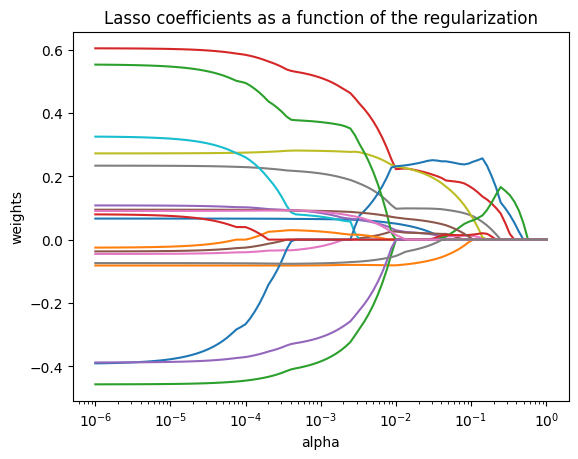

In [11]:
from sklearn.linear_model import Lasso

lasso_regression = Lasso(max_iter=10000)
lasso_coefs = []
lasso_cv = []

for alpha in lasso_alphas:
    lasso_regression.set_params(alpha=alpha)
    lasso_regression.fit(X_preprocessed, y)
    lasso_coefs.append(lasso_regression.coef_)
    lasso_cv.append(cross_val_score(lasso_regression, X_preprocessed, y, cv=5, scoring='r2', n_jobs=-1).mean())

# Plot coefs against the alphas
ax = plt.gca()
ax.plot(lasso_alphas, lasso_coefs)

# Adding titles and labels
plt.xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')

# Show the plot
plt.show()

# Ridge Regression

Now let's see how the linear regression behaves with an L2 regularization, i.e. a Ridge Regression.

In [12]:
ridge_alphas = 10**np.linspace(-3,5,100)
ridge_alphas

array([1.00000000e-03, 1.20450354e-03, 1.45082878e-03, 1.74752840e-03,
       2.10490414e-03, 2.53536449e-03, 3.05385551e-03, 3.67837977e-03,
       4.43062146e-03, 5.33669923e-03, 6.42807312e-03, 7.74263683e-03,
       9.32603347e-03, 1.12332403e-02, 1.35304777e-02, 1.62975083e-02,
       1.96304065e-02, 2.36448941e-02, 2.84803587e-02, 3.43046929e-02,
       4.13201240e-02, 4.97702356e-02, 5.99484250e-02, 7.22080902e-02,
       8.69749003e-02, 1.04761575e-01, 1.26185688e-01, 1.51991108e-01,
       1.83073828e-01, 2.20513074e-01, 2.65608778e-01, 3.19926714e-01,
       3.85352859e-01, 4.64158883e-01, 5.59081018e-01, 6.73415066e-01,
       8.11130831e-01, 9.77009957e-01, 1.17681195e+00, 1.41747416e+00,
       1.70735265e+00, 2.05651231e+00, 2.47707636e+00, 2.98364724e+00,
       3.59381366e+00, 4.32876128e+00, 5.21400829e+00, 6.28029144e+00,
       7.56463328e+00, 9.11162756e+00, 1.09749877e+01, 1.32194115e+01,
       1.59228279e+01, 1.91791026e+01, 2.31012970e+01, 2.78255940e+01,
      

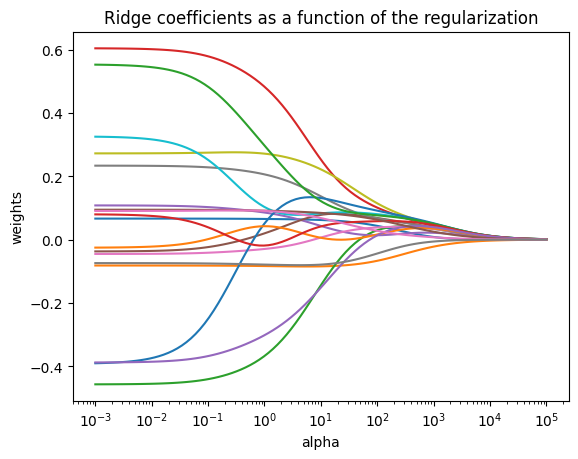

In [13]:
from sklearn.linear_model import Ridge

ridge_regression = Ridge()
ridge_coefs = []
ridge_cv = []

for alpha in ridge_alphas:
    ridge_regression.set_params(alpha=alpha)
    ridge_regression.fit(X_preprocessed, y)
    ridge_coefs.append(ridge_regression.coef_)
    ridge_cv.append(cross_val_score(ridge_regression, X_preprocessed, y, cv=5, scoring='r2', n_jobs=-1).mean())

# Plot coefs against the alphas
ax = plt.gca()
ax.plot(ridge_alphas, ridge_coefs)

# Adding titles and labels
plt.xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')

# Show the plot
plt.show()

## Optimal alphas for the Ridge and Lasso Regression

We can find the alpha using a brute force strategy by computing the cross-validation score for each alpha.

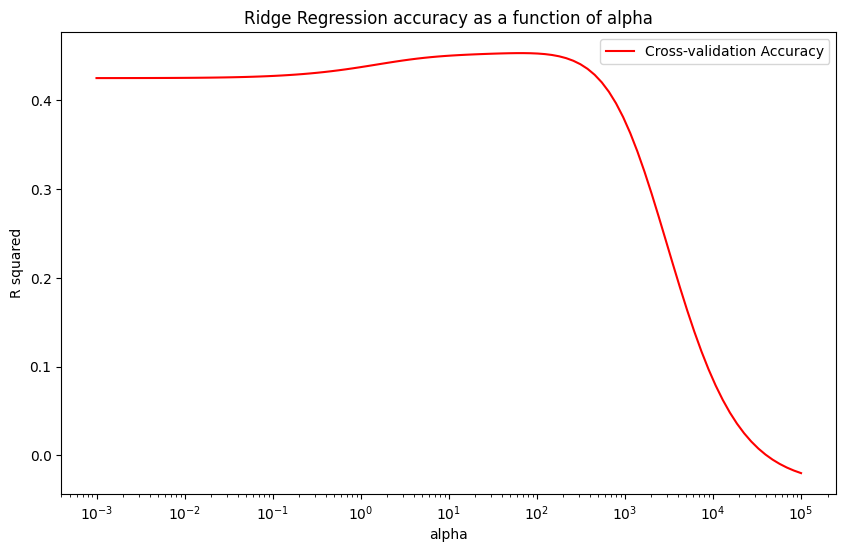

In [14]:
# Plot accuracy against the alphas
plt.figure(figsize=(10, 6))
plt.plot(ridge_alphas, ridge_cv, color='red', label='Cross-validation Accuracy')

# Adding titles and labels
plt.title('Ridge Regression accuracy as a function of alpha')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('R squared')
plt.legend()

# Show the plot
plt.show()

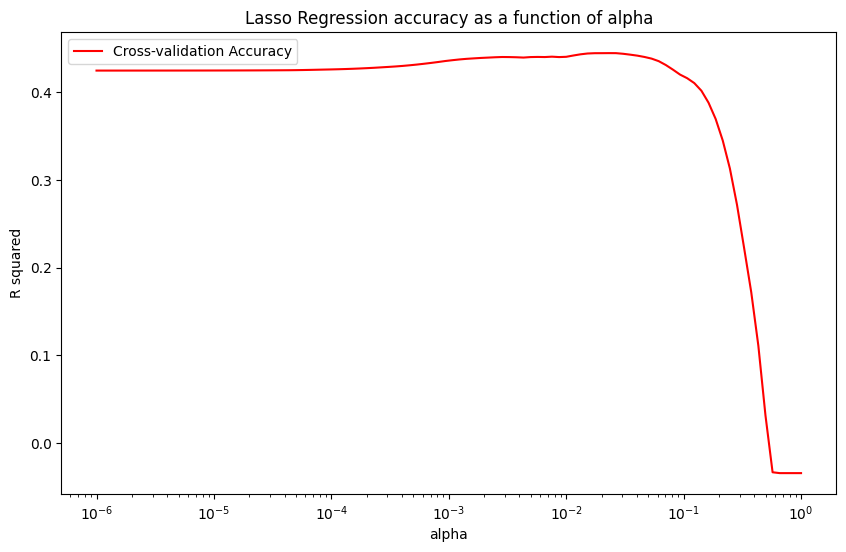

In [15]:
# Plot accuracy against the alphas
plt.figure(figsize=(10, 6))
plt.plot(lasso_alphas, lasso_cv, color='red', label='Cross-validation Accuracy')

# Adding titles and labels
plt.title('Lasso Regression accuracy as a function of alpha')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('R squared')
plt.legend()

# Show the plot
plt.show()